# For Collab and Drive

************************************************

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/AI_Project/transfer learning')

In [ ]:
# !mkdir -p /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/val.zip -d /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/test.zip -d /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/train.zip -d /content/augmented_resized_V2/


****************************************************************

### If run locallay unzip the traning/testing/validation data in augmented_resized_V2 folder and remove content from the paths in the code


### If run on Collab, place the zip files of traning/testing/validation data  in a folder called "AI_Project" in the drive(if you change the name make sure to update the paths above). And uplaod this whole folder as it is to "AI_Project"

[Data link](https://www.kaggle.com/datasets/ascanipek/eyepacs-aptos-messidor-diabetic-retinopathy/data)

In [1]:
import sys
from pathlib import Path
import json
import os

project_root = Path.cwd().parent

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.utils import *
from src.model import *
from src.Dataprocessing import *

In [2]:
os.chdir(project_root)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/ali/Desktop/AIDE/MLOPS/project/Model


In [6]:
from torch.utils.data import DataLoader,WeightedRandomSampler
from torchvision import datasets
import numpy as np

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_transform, val_transform=get_dr_transforms()

train_dataset=datasets.ImageFolder(root="data/train_transfer",transform=train_transform)
val_dataset=datasets.ImageFolder(root="data/test",transform=val_transform)

train_dataloader=DataLoader(train_dataset,batch_size=64,shuffle=True,num_workers=2)
val_dataloader=DataLoader(val_dataset,batch_size=64,shuffle=False,num_workers=2)

In [ ]:
# from torch.utils.data import Subset

# indices_json = "final_indices.json"
# if os.path.exists(indices_json):
#     with open(indices_json, 'r') as f:
#         final_indices = json.load(f)
#     print("Loaded")
# else:
#   # Step 1: get all indices of class 0
#   class0_indices = [i for i, (_, label) in enumerate(train_dataset.imgs) if label == 0]

#   # Step 2: random shuffle them
#   np.random.shuffle(class0_indices)

#   # Step 3: keep only first 20,000 from class 0
#   class0_selected = class0_indices[:10000]

#   # Step 4: keep all other classes
#   other_class_indices = [i for i, (_, label) in enumerate(train_dataset.imgs) if label != 0]

#   # Step 5: final indices
#   final_indices = class0_selected + other_class_indices

#   with open(indices_json, "w") as f:
#     json.dump(final_indices, f)

# len(final_indices)


Loaded


70079

In [ ]:
# import os
# import shutil
# from tqdm import tqdm # Optional: for a progress bar

# # Define paths
# new_train_root = "data/train_transfer"

# # Create the base directory if it doesn't exist
# os.makedirs(new_train_root, exist_ok=True)

# # Loop through the final_indices to copy selected files
# print(f"Copying {len(final_indices)} images to {new_train_root}...")

# for idx in tqdm(final_indices):
#     # 1. Get the source path and original class label from the dataset
#     src_path, label = train_dataset.imgs[idx]
    
#     # 2. Identify the class folder name (e.g., "0", "1", "2")
#     # Using dataset.classes[label] ensures the folder name matches the class
#     class_folder_name = train_dataset.classes[label]
    
#     # 3. Define the destination directory and filename
#     dst_dir = os.path.join(new_train_root, class_folder_name)
#     dst_path = os.path.join(dst_dir, os.path.basename(src_path))
    
#     # 4. Create the class subfolder if it doesn't exist
#     if not os.path.exists(dst_dir):
#         os.makedirs(dst_dir)
    
#     # 5. Copy the file (using shutil.copy2 to preserve metadata)
#     shutil.copy2(src_path, dst_path)

# print("Dataset creation complete.")

Copying 70079 images to data/train_transfer...


100%|██████████| 70079/70079 [00:29<00:00, 2372.94it/s]

Dataset creation complete.


In [ ]:
# # targets = [label for _, label in train_dataset.imgs]
# # class_counts = np.bincount(targets)
# # class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
# # class_weights_tensor = class_weights.to(device)

# # sample_weights = [class_weights[label] for label in targets]

# # sampler = WeightedRandomSampler(weights=sample_weights,
# #                                 num_samples=len(sample_weights),
# #                                 replacement=True)

# train_dataset = Subset(train_dataset, final_indices)

# train_dataloader=DataLoader(train_dataset,batch_size=64,shuffle=True,num_workers=2)
# val_dataloader=DataLoader(val_dataset,batch_size=64,shuffle=False,num_workers=2)

In [7]:

print(len(train_dataloader))
images,labels=next(iter(train_dataloader))

print(labels)
print(np.unique(labels,return_counts=True))

1095
tensor([1, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 2, 4, 1, 0, 0, 0, 2, 4, 3,
        2, 4, 0, 2, 2, 4, 2, 2, 2, 2, 1, 4, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 3, 1,
        1, 4, 2, 1, 3, 3, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0])
(array([0, 1, 2, 3, 4]), array([10, 12, 27,  8,  7]))


In [8]:
import os
if os.path.exists('models/transfer_model/model_accuracy_dict.json'):
    with open('models/transfer_model/model_accuracy_dict.json', 'r') as f:
        Model_accuracy_dict = json.load(f)
        best_accuracy=max(Model_accuracy_dict["transfer learning"]['val_acc'])
else:
    Model_accuracy_dict={"transfer learning":{"train_acc":[],"val_acc":[]}}
    best_accuracy=None

In [9]:
print(Model_accuracy_dict)

{'transfer learning': {'train_acc': [0.49415659470026685, 0.5836841279127841, 0.6251658842163844, 0.6597126100543672, 0.6939025956420611, 0.727478987999258, 0.7550478745415887, 0.7831732758743704, 0.8106708143666433, 0.8307624252629175, 0.8544071690520698, 0.8708029509553504], 'val_acc': [0.5327793817336808, 0.5884092669530315, 0.5322160411238646, 0.5856629814801775, 0.5598901485810859, 0.5946764312372368, 0.5859446517850856, 0.5861559045137666, 0.5858038166326315, 0.5892542778677557, 0.5663685655939723, 0.5534117315681994]}}


In [10]:
from torchvision import models

pretrained=models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
pretraiend_weights=pretrained.state_dict()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/ali/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [02:37<00:00, 651kB/s]


In [13]:
save_path='models/transfer_model/transfer_model.pth'
best_path='models/transfer_model/best_transfer_model_lr_0001.pth'
model=resnet50(block=Bottleneck,layers=[3,4,6,3],num_classes=2)

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),        # add dropout before final classification
    nn.Linear(num_ftrs, 5)
)

if os.path.exists(save_path):
    model.load_state_dict(torch.load(save_path, map_location=device))
else:
  pretrained_dict={k:v for k,v in pretraiend_weights.items() if k in model.state_dict() and v.size() == model.state_dict()[k].size()}
  model.load_state_dict(pretrained_dict,strict=False)
  print("Pretrained weights are loaded")

model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer = torch.optim.Adam([
    {"params": model.conv1.parameters(), "lr": 1e-6},
    {"params": model.layer1.parameters(), "lr": 1e-6},
    {"params": model.layer2.parameters(), "lr": 1e-6},

    {"params": model.layer3.parameters(), "lr": 1e-6},

    {"params": model.layer4.parameters(), "lr": 1e-5},

    {"params": model.fc.parameters(), "lr": 0.5e-4},  # New head
], weight_decay=1e-5)


[1,  100] loss: 0.780
[1,  200] loss: 0.790
[1,  300] loss: 0.777
[1,  400] loss: 0.779
[1,  500] loss: 0.778
[1,  600] loss: 0.787
[1,  700] loss: 0.779
[1,  800] loss: 0.780
[1,  900] loss: 0.767
[1, 1000] loss: 0.775
Train Accuracy: 0.811
Validation Accuracy: 0.586


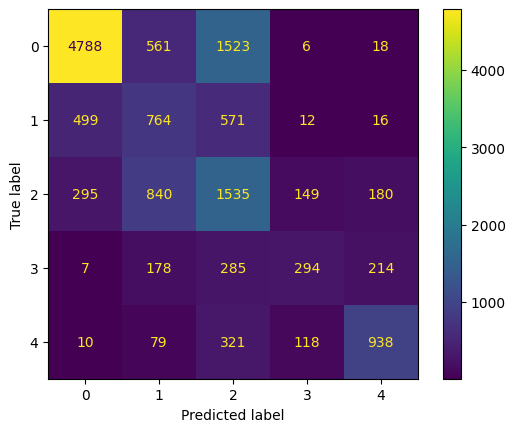

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      6896
           1       0.32      0.41      0.36      1862
           2       0.36      0.51      0.42      2999
           3       0.51      0.30      0.38       978
           4       0.69      0.64      0.66      1466

    accuracy                           0.59     14201
   macro avg       0.55      0.51      0.52     14201
weighted avg       0.64      0.59      0.60     14201

[2,  100] loss: 1.472
[2,  200] loss: 0.738
[2,  300] loss: 0.733
[2,  400] loss: 0.743
[2,  500] loss: 0.742
[2,  600] loss: 0.735
[2,  700] loss: 0.756
[2,  800] loss: 0.749
[2,  900] loss: 0.748
[2, 1000] loss: 0.744
Train Accuracy: 0.831
Validation Accuracy: 0.589


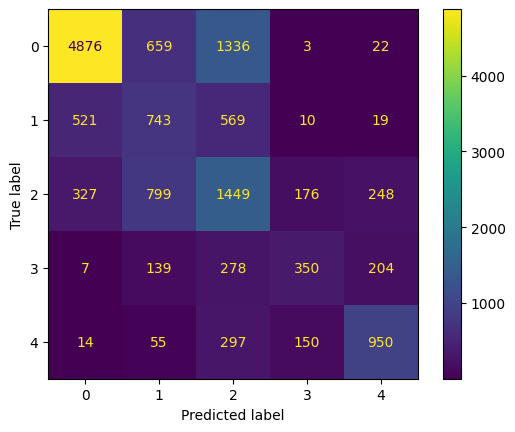

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      6896
           1       0.31      0.40      0.35      1862
           2       0.37      0.48      0.42      2999
           3       0.51      0.36      0.42       978
           4       0.66      0.65      0.65      1466

    accuracy                           0.59     14201
   macro avg       0.54      0.52      0.52     14201
weighted avg       0.63      0.59      0.61     14201

[3,  100] loss: 1.414
[3,  200] loss: 0.701
[3,  300] loss: 0.710
[3,  400] loss: 0.700
[3,  500] loss: 0.715
[3,  600] loss: 0.707
[3,  700] loss: 0.712
[3,  800] loss: 0.703
[3,  900] loss: 0.710
[3, 1000] loss: 0.719
Train Accuracy: 0.854
Validation Accuracy: 0.566


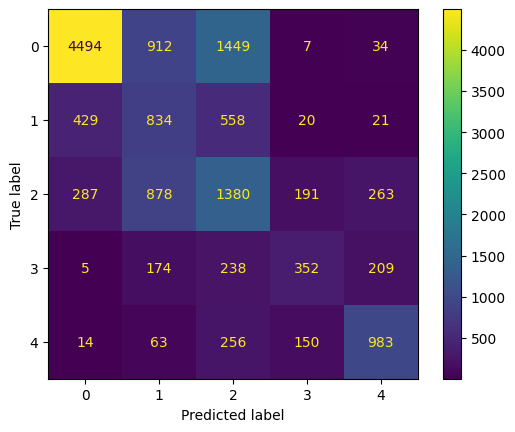

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      6896
           1       0.29      0.45      0.35      1862
           2       0.36      0.46      0.40      2999
           3       0.49      0.36      0.41       978
           4       0.65      0.67      0.66      1466

    accuracy                           0.57     14201
   macro avg       0.53      0.52      0.51     14201
weighted avg       0.63      0.57      0.59     14201

[4,  100] loss: 1.350
[4,  200] loss: 0.685
[4,  300] loss: 0.685
[4,  400] loss: 0.684
[4,  500] loss: 0.680
[4,  600] loss: 0.688
[4,  700] loss: 0.674
[4,  800] loss: 0.683
[4,  900] loss: 0.684
[4, 1000] loss: 0.681
Train Accuracy: 0.871
Validation Accuracy: 0.553


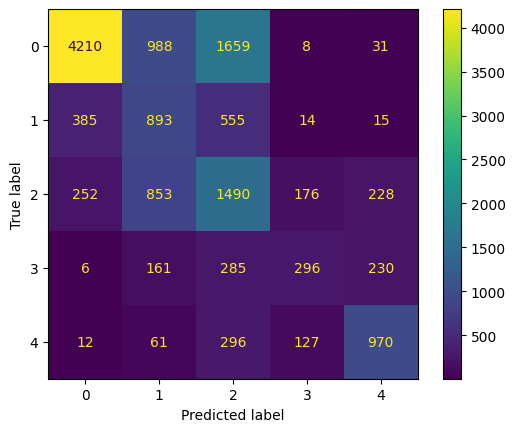

              precision    recall  f1-score   support

           0       0.87      0.61      0.72      6896
           1       0.30      0.48      0.37      1862
           2       0.35      0.50      0.41      2999
           3       0.48      0.30      0.37       978
           4       0.66      0.66      0.66      1466

    accuracy                           0.55     14201
   macro avg       0.53      0.51      0.51     14201
weighted avg       0.63      0.55      0.58     14201



In [ ]:
# for g in optimizer.param_groups:
#     g['lr'] = 5e-5

train_acc,val_acc=model_inference(model,train_dataloader,val_dataloader,4,optimizer,criterion,best_path,save_path,device,best_accuracy)
Model_accuracy_dict["transfer learning"]["train_acc"].extend(train_acc)
Model_accuracy_dict["transfer learning"]["val_acc"].extend(val_acc)


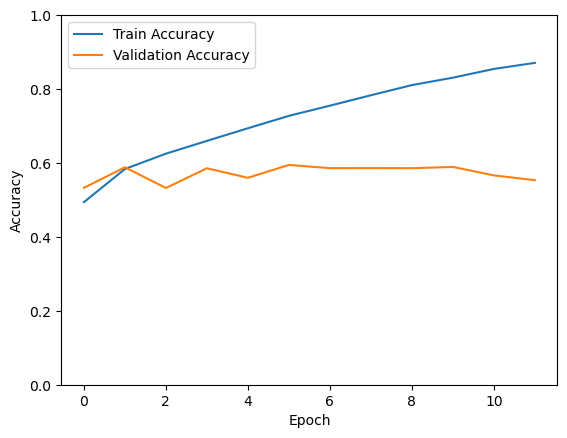

In [12]:
accuracy_plot({"train_acc":Model_accuracy_dict["transfer learning"]["train_acc"],"val_acc":Model_accuracy_dict["transfer learning"]["val_acc"]})

In [ ]:
with open('models/transfer_model/model_accuracy_dict.json', 'w') as f:
    json.dump(Model_accuracy_dict, f)

In [ ]:
test_transform=T.Compose(
    [
        DRPreprocess(),
        T.Resize(224),
        T.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.2),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ]
)

testdata=datasets.ImageFolder(root="data/val",transform=test_transform)
test_dataloader=DataLoader(testdata,batch_size=64,shuffle=False,num_workers=2)

accuracy_test(model,test_dataloader,5,device)

Accuracy of     0 : 89.35 %
Accuracy of     1 : 44.83 %
Accuracy of     2 : 57.45 %
Accuracy of     3 : 50.00 %
Accuracy of     4 : 50.00 %
